# <span style="font-family:Times New Roman">Code 6. Дополнительная визуализация</span> 

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import IPython.display as ipd

import librosa
import librosa.display
from scipy.signal import windows as w
from sklearn.preprocessing import minmax_scale

Импортируем стиль визуализации из файла `custom_mplstyle.txt`

In [2]:
plt.style.use('ExtraData\\custom_mplstyle.txt')

Упрощенные названия используемых цветов

In [14]:
colors = {'blue': '#18c0c4', 'pink': '#f62196', 
          'violet': '#A267F5', 'orange': '#f3907e', 
          'yellow': '#ffe46b', 'white': '#fefeff', 
          'darkblue': '#212946', 'darkpink': '#371d49'}

Загружаем четырёхсекундный аудиофайл `Antonio Vivaldi – Allegro_2.wav` для дальнейшей визуализации

In [3]:
example_path = 'C:\\Users\\micha\\OneDrive\\Рабочий стол\\Курсовая\\Music\\Antonio Vivaldi – Allegro_2.wav'
y, sr = librosa.load(example_path)
ipd.Audio(y, rate=sr)

## <span style="font-family:Times New Roman">Осциллограмма</span> 

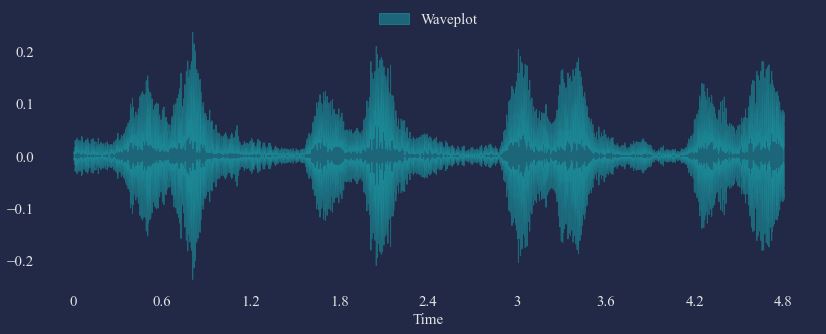

In [15]:
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, label='Waveplot')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1))

plt.savefig(f'Images/Example_Waveform.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Спектрограмма</span> 

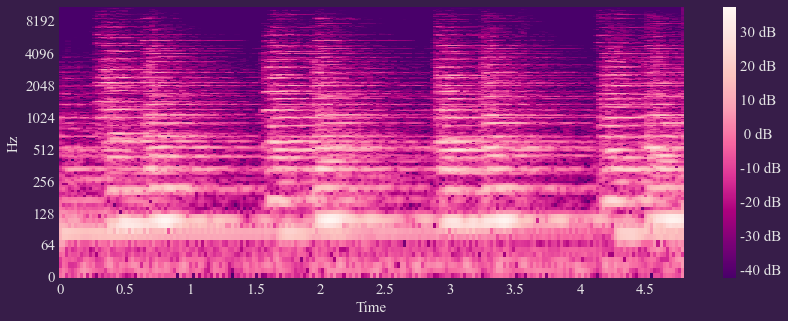

In [5]:
X = librosa.stft(y)
X_db = librosa.amplitude_to_db(np.abs(X))

fig = plt.figure()
fig.patch.set_facecolor(colors['darkpink'])
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='log', cmap=plt.cm.RdPu_r)
plt.colorbar(format='%2.0f dB')

plt.savefig(f'Images/Example_Spectrogram.png', facecolor=colors['darkpink'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Оконные функции для STFT</span> 

In [18]:
windows = np.array([w.boxcar(51), w.triang(51), w.blackman(51), w.hamming(51), w.hann(51), 
                    w.bartlett(51), w.flattop(51), w.parzen(51), w.bohman(51), w.blackmanharris(51), 
                    w.nuttall(51), w.barthann(51), w.cosine(51), w.exponential(51), w.tukey(51), 
                    w.general_gaussian(51, 7, 1.5), w.kaiser(51, 14), w.gaussian(51, 7), w.taylor(51),
                    w.general_hamming(51, 0.7), w.chebwin(51, 100)]).reshape(3, 7, 51)
windows_names = np.array(['boxcar', 'triang', 'blackman', 'hamming', 'hann', 
                          'bartlett', 'flattop', 'parzen', 'bohman', 'blackmanharris', 
                          'nuttall', 'barthann', 'cosine', 'exponential', 'tukey', 
                          'general gaussian(1.5, 7)', 'kaiser(14)', 'gaussian(7)', 'taylor', 
                          'general hamming(0.7)', 'chebwin(100)']).reshape(3, 7)

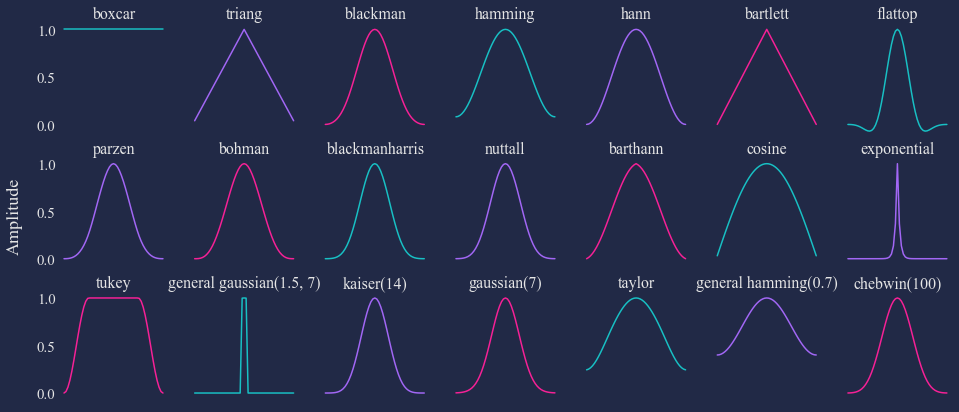

In [19]:
nrows, ncols = 3, 7
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 7), sharey=True)
fig.supylabel("Amplitude", x=0.08)

sample_colors = [colors['blue'], colors['violet'], colors['pink']]

for row in range(nrows):
    for col in range(ncols):
        axes[row, col].plot(windows[row, col], color=sample_colors[(col+row)%3])
        axes[row, col].set_title(windows_names[row, col], fontsize=16)
        axes[row, col].set_xticklabels([])
        
plt.savefig(f'Images/Example_Windows.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Мел-Спектрограмма</span> 

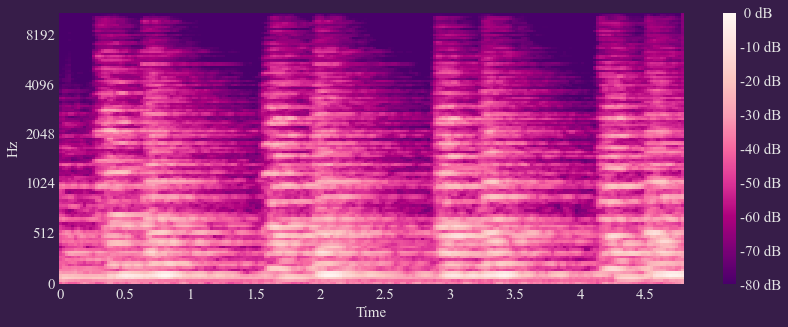

In [8]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

fig = plt.figure()
fig.patch.set_facecolor('#371d49')
librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel', cmap=plt.cm.RdPu_r)
plt.colorbar(format='%2.0f dB')

plt.savefig(f'Images/Example_Mel_Spectrogram.png', facecolor="#371d49", bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Spectral Centroid (Спектральный центроид)</span> 

Определяем вспомогательную функцию для нормализации спектрального центроида для визуализации:

In [9]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

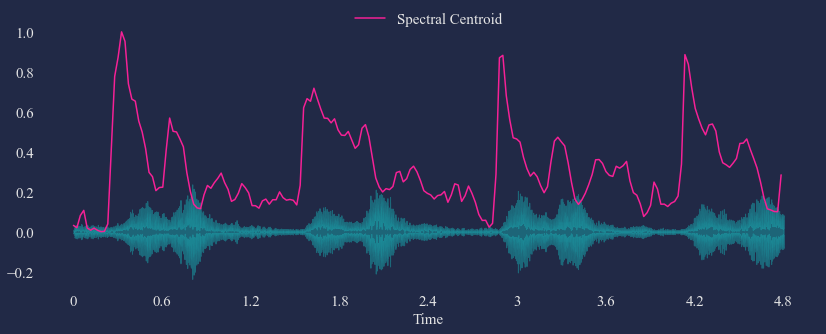

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), lw=1.5, label='Spectral Centroid') # нормализованный для целей визуализации
plt.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)

plt.savefig(f'Images/Example_Centroid.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Spectral Bandwidth (Спектральная полоса пропускания)</span> 

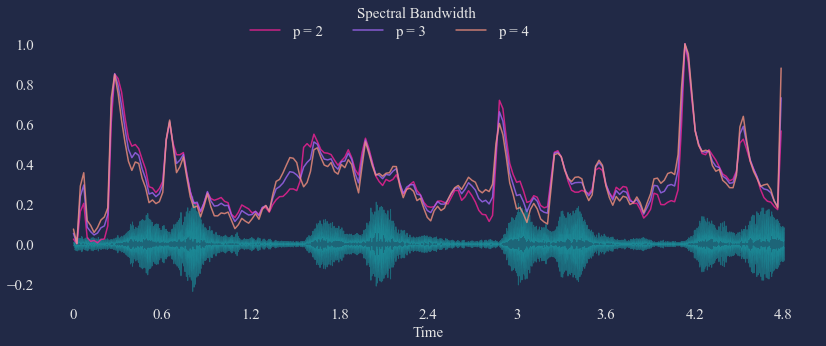

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=4)[0]

librosa.display.waveshow(y, sr=sr, alpha=0.4)

plt.suptitle('Spectral Bandwidth', fontsize=15, y=0.95)
plt.plot(t, normalize(spectral_bandwidth_2), linestyle='-', alpha=0.8, label='p = 2')
plt.plot(t, normalize(spectral_bandwidth_3), linestyle='-', alpha=0.8, label='p = 3')
plt.plot(t, normalize(spectral_bandwidth_4), linestyle='-', alpha=0.8, label='p = 4')

plt.legend(loc='center', bbox_to_anchor=(0.45, 1), ncol = 3)

plt.savefig(f'Images/Example_Bandwidth.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Spectral Rolloff (Спектральный сдвиг)</span> 

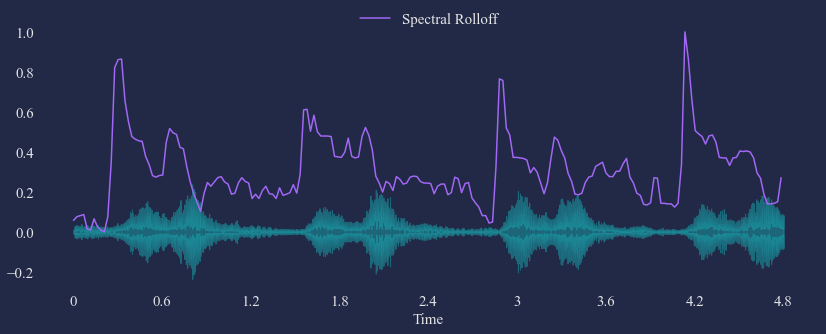

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color=color['blue'])
plt.plot(t, normalize(spectral_rolloff), color=colors['violet'], label='Spectral Rolloff')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)

plt.savefig(f'Images/Example_Rolloff.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Spectral Flux (Спектральный поток)</span> 

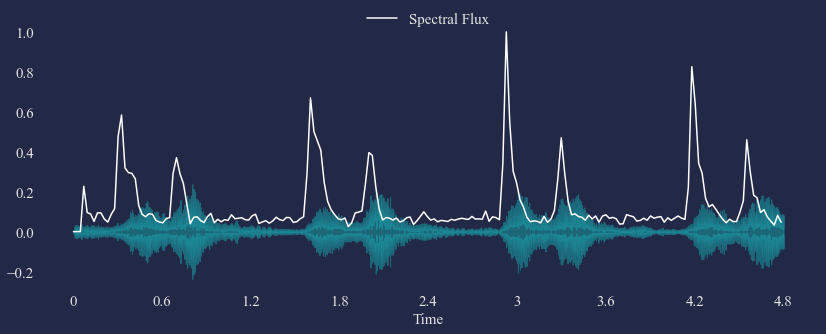

In [20]:
spectral_flux = librosa.onset.onset_strength(y=y, sr=sr)

frames = range(len(spectral_flux))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_flux), lw=1.5, label='Spectral Flux', color=colors['white'])
plt.legend(loc='center', bbox_to_anchor=(0.5, 1))

plt.savefig(f'Images/Example_Flux.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Zero-Crossing rate (Частота пересечения нуля)</span> 

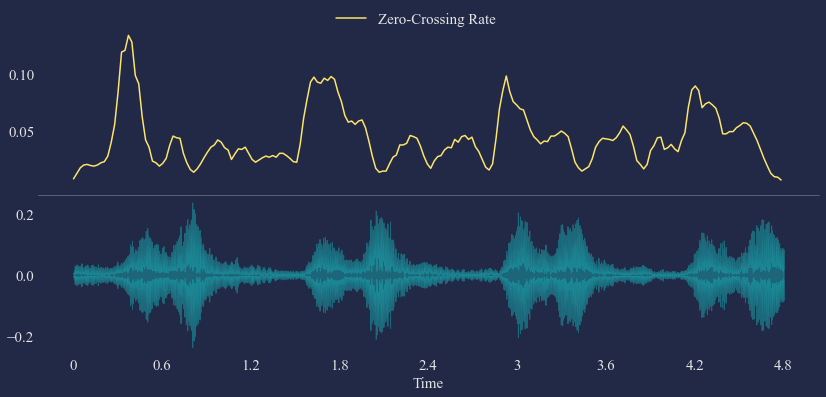

In [31]:
zero_crossings = librosa.feature.zero_crossing_rate(y=y)

fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
plt.subplots_adjust(hspace=0.05)

axes[0].plot(t, zero_crossings.T, color=colors['yellow'], label='Zero-Crossing Rate')
librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color=colors['blue'], ax=axes[1])

axes[1].spines['top'].set_color('white')
axes[1].spines['top'].set_lw(0.5)
axes[1].spines['top'].set_alpha(0.5)

fig.legend(loc='center', bbox_to_anchor=(0.5, 0.9))

plt.savefig(f'Images/Example_Zcr.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">Low-Energy feature (Низкоуровневая энергия)</span> 

Low-energy feature: 0.5845410628019324


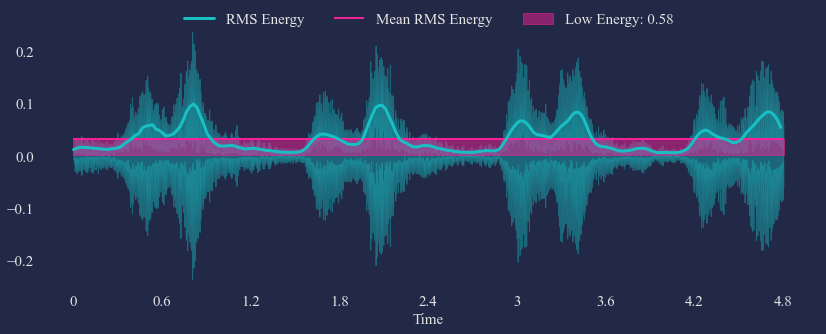

In [32]:
rms = librosa.feature.rms(y=y)
threshold = np.mean(rms)
low_energy = sum(rms[0] < threshold) / len(rms[0])
print('Low-energy feature:', low_energy)

librosa.display.waveshow(y=y, sr=sr, alpha=0.4, color=colors['blue'])
full_t = np.append(t, t[-1] + 0.02)

plt.hlines(np.full(len(rms[0]), threshold), full_t.min(), full_t.max(), color=colors['pink'], lw=2, label='Mean RMS Energy')
plt.fill_between(full_t, threshold, color=colors['pink'], alpha=0.5, label=f'Low Energy: {low_energy:.2f}')
plt.plot(t, rms[0], color=colors['blue'], lw=3, label='RMS Energy')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)

plt.savefig(f'Images/Example_LE.png', facecolor=colors['darkblue'], bbox_inches = 'tight', dpi = 300);

## <span style="font-family:Times New Roman">MFCC</span> 

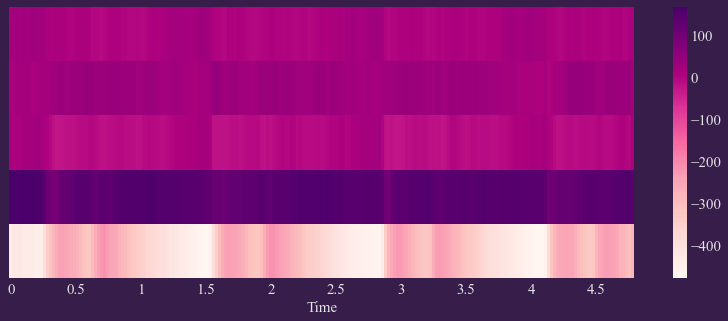

In [34]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)

fig = plt.figure()
librosa.display.specshow(mfccs, x_axis='time', cmap=plt.cm.RdPu)
fig.patch.set_facecolor(colors['darkpink'])
plt.colorbar()

plt.savefig(f'Images/Example_MFCC.png', facecolor=colors['darkpink'], bbox_inches = 'tight', dpi = 300);

In [36]:
import matplotlib.animation as animation

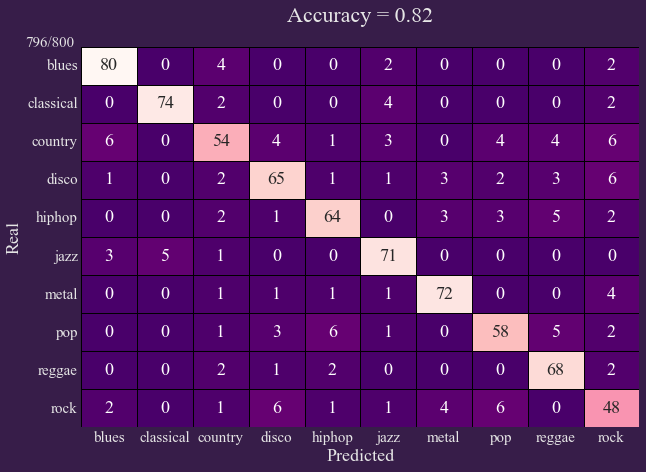

In [166]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('#371d49')

def animate(i):
    ax.clear()

    ax.text(-1, 0, f'{i}/800')

    test = Y_test[:i]
    pred = Y_pred[:i]
    
    cm = confusion_matrix(test, pred)
    
    sns.heatmap(cm,
                linewidths=.5, linecolor="black",
                cmap=plt.cm.RdPu_r,
                annot=True, fmt='g', annot_kws={'fontsize':18},
                xticklabels=genre_names, yticklabels=genre_names, 
                ax=ax, cbar=False)
    
    acc = accuracy_score(test, pred)
    ax.set_title(f'Accuracy = {acc:.2f}', fontsize=22, y=1.05)
    ax.set_xlabel('Predicted', fontsize=18)
    ax.set_ylabel('Real', fontsize=18)
    
    return ax

plot_performance_animation = animation.FuncAnimation(fig, animate, frames=np.arange(26, 801, 10), repeat=False)
f = "Images/confmatrix.gif" 
writergif = animation.PillowWriter(fps=40) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor='#371d49'))

NameError: name 'plot_performance_animation' is not defined

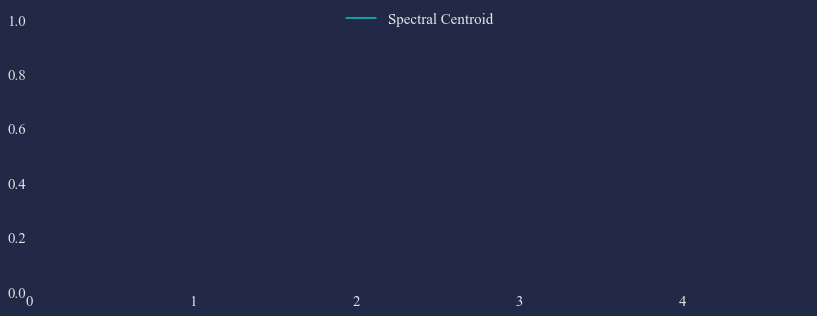

In [40]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def animate(i):
    ax.clear()

    ax.text(-1, 0, f'{i}/800')

    test = Y_test[:i]
    pred = Y_pred[:i]
    
    cm = confusion_matrix(test, pred)
    
    sns.heatmap(cm,
                linewidths=.5, linecolor="black",
                cmap=plt.cm.RdPu_r,
                annot=True, fmt='g', annot_kws={'fontsize':18},
                xticklabels=genre_names, yticklabels=genre_names, 
                ax=ax, cbar=False)
    
    acc = accuracy_score(test, pred)
    ax.set_title(f'Accuracy = {acc:.2f}', fontsize=22, y=1.05)
    ax.set_xlabel('Predicted', fontsize=18)
    ax.set_ylabel('Real', fontsize=18)
    
    return ax

plot_performance_animation = animation.FuncAnimation(fig, animate, frames=np.arange(26, 801, 10), repeat=False)
f = "Images/sc_anim.gif" 
writergif = animation.PillowWriter(fps=40) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))

In [183]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
normalized_spectral_centroids = normalize(spectral_centroids)

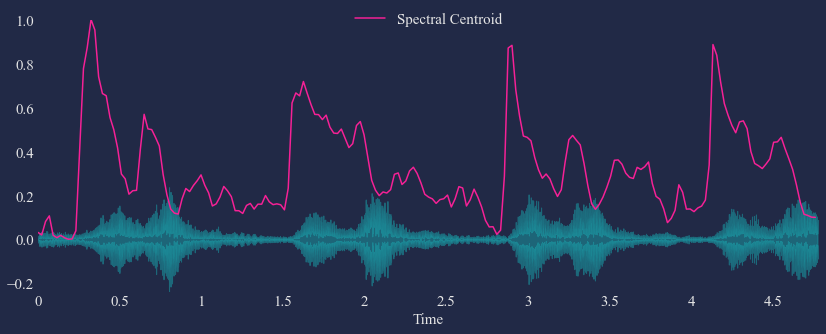

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def centroid_animate(frame):
    ax.clear()

    frames = range(len(spectral_centroids[:frame]))
    t = librosa.frames_to_time(frames)
    
    ax.set_xlim(0, librosa.frames_to_time(range(len(spectral_centroids))).max())
    ax.set_ylim(bottom=y.min())
    librosa.display.waveshow(y=y[:int(y.shape[0]/len(spectral_centroids)) * frame], sr=sr, alpha=0.4, ax=ax)

    ax.plot(t, normalized_spectral_centroids[:frame], lw=1.5, label='Spectral Centroid')
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)
    return ax


plot_performance_animation = animation.FuncAnimation(fig, centroid_animate, repeat=False,
                                                     frames=np.arange(1, spectral_centroids.shape[0], 1))
f = "Images/Centroid.gif" 
writergif = animation.PillowWriter(fps=int(spectral_centroids.shape[0] * sr / y.shape[0]) + 6) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))

In [157]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=4)[0]

In [177]:
normalized_spectral_bandwidth_2 = normalize(spectral_bandwidth_2)
normalized_spectral_bandwidth_3 = normalize(spectral_bandwidth_3)
normalized_spectral_bandwidth_4 = normalize(spectral_bandwidth_3)

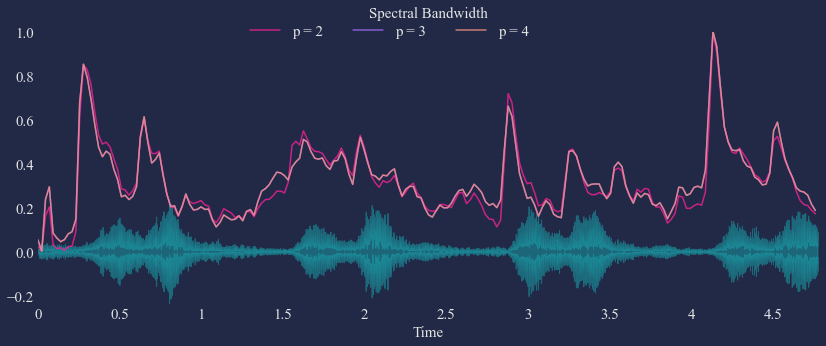

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def bandwidth_animate(frame):
    ax.clear()

    frames = range(len(spectral_bandwidth_2[:frame]))
    t = librosa.frames_to_time(frames)
    
    ax.set_xlim(0, librosa.frames_to_time(range(len(spectral_bandwidth_2))).max())
    ax.set_ylim(bottom=y.min())
    librosa.display.waveshow(y=y[:int(y.shape[0]/len(spectral_bandwidth_2)) * frame], sr=sr, alpha=0.4, ax=ax)

    ax.set_title('Spectral Bandwidth', fontsize=15, y=1.03)
    ax.plot(t, normalized_spectral_bandwidth_2[:frame], linestyle='-', alpha=0.8, label='p = 2')
    ax.plot(t, normalized_spectral_bandwidth_3[:frame], linestyle='-', alpha=0.8, label='p = 3')
    ax.plot(t, normalized_spectral_bandwidth_4[:frame], linestyle='-', alpha=0.8, label='p = 4')
    
    ax.legend(loc='center', bbox_to_anchor=(0.45, 1), ncol = 3)
    return ax

plot_performance_animation = animation.FuncAnimation(fig, bandwidth_animate, repeat=False,
                                                     frames=np.arange(1, spectral_bandwidth_2.shape[0], 1))
f = "Images/Bandwidth.gif" 
writergif = animation.PillowWriter(fps=int(spectral_bandwidth_2.shape[0] * sr / y.shape[0]) + 6) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))

In [186]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
normalized_spectral_rolloff = normalize(spectral_rolloff)

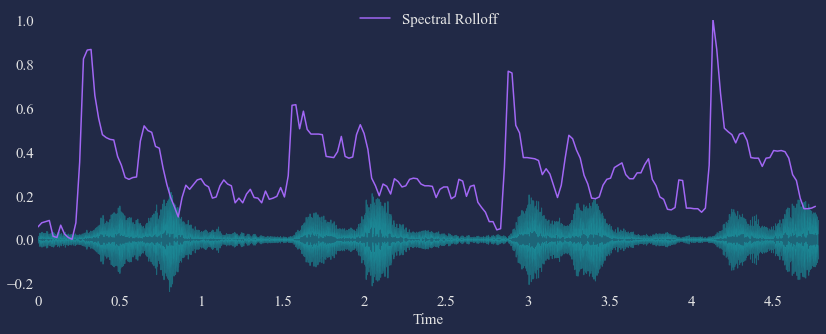

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def rolloff_animate(frame):
    ax.clear()

    frames = range(len(spectral_rolloff[:frame]))
    t = librosa.frames_to_time(frames)
    
    ax.set_xlim(0, librosa.frames_to_time(range(len(spectral_rolloff))).max())
    ax.set_ylim(bottom=y.min())
    librosa.display.waveshow(y=y[:int(y.shape[0]/len(spectral_rolloff)) * frame], sr=sr, alpha=0.4, ax=ax)

    ax.plot(t, normalized_spectral_rolloff[:frame], color=colors['violet'], label='Spectral Rolloff')
    
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)
    return ax

plot_performance_animation = animation.FuncAnimation(fig, rolloff_animate, repeat=False,
                                                     frames=np.arange(1, spectral_rolloff.shape[0], 1))
f = "Images/Rolloff.gif" 
writergif = animation.PillowWriter(fps=int(spectral_rolloff.shape[0] * sr / y.shape[0]) + 6) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))

In [190]:
spectral_flux = librosa.onset.onset_strength(y=y, sr=sr)
normalized_spectral_flux = normalize(spectral_flux)

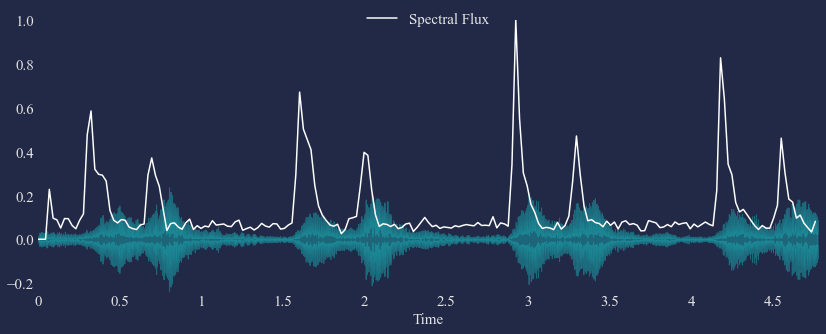

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def flux_animate(frame):
    ax.clear()

    frames = range(len(spectral_flux[:frame]))
    t = librosa.frames_to_time(frames)
    
    ax.set_xlim(0, librosa.frames_to_time(range(len(spectral_flux))).max())
    ax.set_ylim(bottom=y.min())
    librosa.display.waveshow(y=y[:int(y.shape[0]/len(spectral_flux)) * frame], sr=sr, alpha=0.4, ax=ax)

    ax.plot(t, normalized_spectral_flux[:frame], lw=1.5, label='Spectral Flux', color=colors['white'])
    
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1))
    return ax

plot_performance_animation = animation.FuncAnimation(fig, flux_animate, repeat=False,
                                                     frames=np.arange(1, spectral_flux.shape[0], 1))
f = "Images/Flux.gif" 
writergif = animation.PillowWriter(fps=int(spectral_flux.shape[0] * sr / y.shape[0]) + 6) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))

In [ ]:
rms = librosa.feature.rms(y=y)
threshold = np.mean(rms)
low_energy = sum(rms[0] < threshold) / len(rms[0])

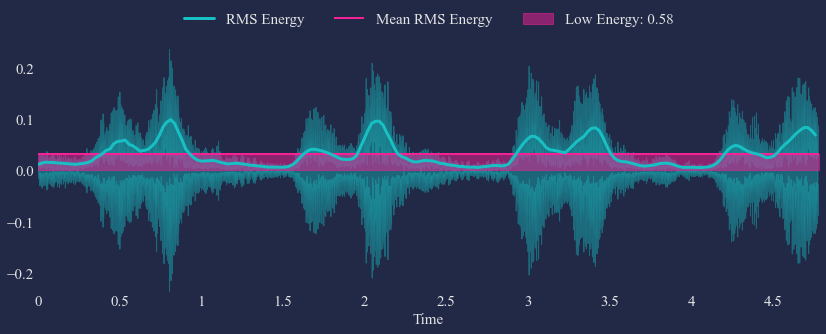

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.patch.set_facecolor(color=colors['darkblue'])

def le_animate(frame):
    ax.clear()

    frames = range(len(rms[0][:frame]))
    t = librosa.frames_to_time(frames)
    
    full_t = np.append(t, t[-1] + 0.02)
    
    ax.set_xlim(0, librosa.frames_to_time(range(len(rms[0]))).max())
    ax.set_ylim(bottom=y.min(), top=y.max()+0.1)

    librosa.display.waveshow(y=y[:int(y.shape[0]/len(rms[0])) * frame], sr=sr, alpha=0.4, ax=ax)

    ax.hlines(np.full(len(rms[0][:frame]), threshold), full_t.min(), full_t.max(), 
              color=colors['pink'], lw=2, label='Mean RMS Energy')
    ax.fill_between(full_t, threshold, color=colors['pink'], alpha=0.5, label=f'Low Energy: {low_energy:.2f}')
    ax.plot(t, rms[0][:frame], color=colors['blue'], lw=3, label='RMS Energy')
    
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1), ncol = 3)
    return ax

plot_performance_animation = animation.FuncAnimation(fig, le_animate, repeat=False,
                                                     frames=np.arange(1, spectral_flux.shape[0], 1))
f = "Images/LE.gif" 
writergif = animation.PillowWriter(fps=int(spectral_flux.shape[0] * sr / y.shape[0]) + 6) 
plot_performance_animation.save(f, writer=writergif, dpi=200, savefig_kwargs=dict(facecolor=colors['darkblue']))